/home/hungt/curveball/curveball-im/networkit/graphio.py
Finished randomizing the samples...


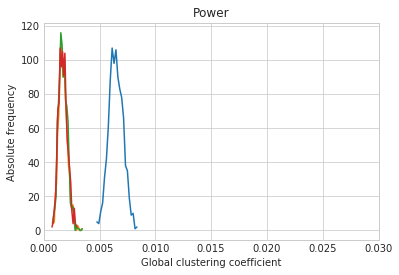

Done.


In [4]:
from networkit import *
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
import pylab as p

print(graphio.__file__)

# Get the graphs
gPower = graphio.readGraph("power.gml", Format.GML, directed=True)
for u, v in gPower.edges():
    gPower.addEdge(v, u)
    
sample_size = 1000
    
# Generate 1000 Samples
gPower_samples = [copy.deepcopy(gPower) for i in range(sample_size)]

# Randomize for 0.5*m swaps
gPower_1 = []
swapGen = curveball.UniformTradeGenerator(math.ceil(0.5 * gPower.numberOfEdges()), gPower.numberOfEdges())
for i in range(sample_size):
    esmc = curveball.EdgeSwitchingMarkovChainRandomization(gPower)
    esmc.run(swapGen.generate())
    gPower_1.append(esmc.getGraph())
    
# Randomize for another 2*m swaps (2.5*m now)
gPower_2 = []
swapGen = curveball.UniformTradeGenerator(2 * gPower.numberOfEdges(), gPower.numberOfEdges())
for g in gPower_1:
    esmc = curveball.EdgeSwitchingMarkovChainRandomization(g)
    esmc.run(swapGen.generate())
    gPower_2.append(esmc.getGraph())
    
# Randomize for another 2.5*m swaps (5*m now)
gPower_3 = []
swapGen = curveball.UniformTradeGenerator(math.ceil(2.5 * gPower.numberOfEdges()), gPower.numberOfEdges())
for g in gPower_2:
    esmc = curveball.EdgeSwitchingMarkovChainRandomization(g)
    esmc.run(swapGen.generate())
    gPower_3.append(esmc.getGraph())
    
# Randomize for another 2.5*m swaps (7.5*m now)
gPower_4 = []
swapGen = curveball.UniformTradeGenerator(math.ceil(2.5 * gPower.numberOfEdges()), gPower.numberOfEdges())
for g in gPower_3:
    esmc = curveball.EdgeSwitchingMarkovChainRandomization(g)
    esmc.run(swapGen.generate())
    gPower_4.append(esmc.getGraph())

print("Finished randomizing the samples...")

def plot_line_histogram_gcc(graph_dataset, xmin, xmax, label):
    fig, ax = plt.subplots()
    ax.set_xlim([xmin,xmax])
    plt.title(label)
    plt.xlabel("Global clustering coefficient")
    plt.ylabel("Absolute frequency")
    for graph_data in graph_dataset:
        data = np.array([np.average(centrality.scores(g, centrality.LocalClusteringCoefficient, True)) for g in graph_data])
        y, binEdges = np.histogram(data, bins='fd')
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        ax.plot(bincenters, y, '-')

def plot_line_histogram_diam(graph_dataset, xmin, xmax, label):
    fig, ax = plt.subplots()
    ax.set_xlim([xmin,xmax])
    plt.title(label)
    plt.xlabel("Diameter")
    plt.ylabel("Absolute frequency")
    for graph_data in graph_dataset:
        data = np.array([distance.Diameter(g, distance.DiameterAlgo.Exact).run().getDiameter() for g in graph_data])
        y, binEdges = np.histogram(data, bins='fd')
        bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
        ax.plot(bincenters, y, '-')
        
plot_line_histogram_gcc([gPower_1, gPower_2, gPower_3, gPower_4], 0, 0.03, "Power")
# plot_line_histogram_diam([gPower_1, gPower_2, gPower_3, gPower_4], 0, 20, "Power")
plt.show()
plt.close()
print("Done.")